In [1]:
MAC=False
if MAC: 
    rootf = '/Users'
else:
    rootf = '/home'

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
# %load_ext autotime

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os as os
import sys
sys.path.append('./extraction_functions') #this is where we put all the functions.py
sys.path.append('./../../functions_PVA') #this is where we put all the functions.py
#from brpylib import *

import matplotlib.pyplot as plt
from numpy               import arange


from extract_triggers import *

from save_load import *

# Load measurement times

In [3]:
MYOPIA=False

Mtimes = []
Trigs = []

fs=20000

exp='_20190524'
nmeas=7
time_elapsed = 0
for meas in np.arange(nmeas)+1:
#for meas in [7,1,2,5,4,3,6]:       #for experiment '_20190524'
    
    rootF= '/media/eqs8/Samuele_01/Salamander2/pckls_triggers/'
    #the folder where the pickles are
    if MYOPIA:
        rootF= rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/exp_sorted/MYOPIA/Triggers/'
    
    trigs,ttot= load_obj(rootF + 'exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt')
    
    Trigs.append(time_elapsed+trigs/fs)
    Mtimes.append(time_elapsed)
    
    time_elapsed+=ttot
Mtimes.append(time_elapsed)

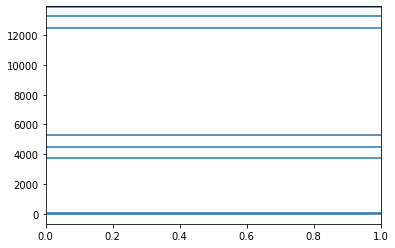

In [4]:
for m in Mtimes[:]:
    axhline(m)

# Write triggers to txt

In [9]:
import csv
for meas in [1,2]:
    filesave = 'trigs_exp'+str(exp)+'_meas'+str(meas)+'.csv'

    numpy.savetxt(filesave, Trigs[meas-1],fmt='%f', delimiter=",")

In [8]:
# import csv

# with open('file.csv', mode='w') as file:
    
#     for tr in Trigs[0]:
        
#         trigsw = csv.writer(file, delimiter=',')
#         print(tr)#-(11.66666+60)
#         trigsw.writerow(tr)


# Load spike data

In [5]:
UNSORTED = False

# exp=17
exp='_20190524'

rootF ='/media/eqs8/BC_Samuele/20190524/sorting/recording_0/recording_0.GUI/'
#the folder with the output of the sorting

spike_times= load(rootF + 'spike_times.npy')

spike_clusters= load(rootF + 'spike_clusters.npy')  

if UNSORTED:
    Clusters= unique(spike_clusters)
else:
    import csv as csv
    cgf = open(rootF + 'cluster_group.tsv')  
    cgfr = csv.reader(cgf,delimiter="\t") 
    cluster_group = dict()
    next(cgfr)
    for row in cgfr:
        cluster_group[row[0]]=row[1]
    Clusters =np.array(list(cluster_group.keys()),dtype='int')

In [6]:
goodlist=[]
for clus in cluster_group:
    if cluster_group[clus]=='good': goodlist.append(clus)
        
spike_clusters.shape

spike_clusters[0:20],spike_times[0:20]
len(goodlist),len(cluster_group),cluster_group

(23,
 763,
 {'0': 'noise',
  '1': 'noise',
  '2': 'noise',
  '3': 'noise',
  '4': 'noise',
  '5': 'mua',
  '6': 'noise',
  '7': 'noise',
  '8': 'noise',
  '9': 'noise',
  '11': 'mua',
  '13': 'noise',
  '14': 'noise',
  '15': 'noise',
  '16': 'noise',
  '17': 'noise',
  '18': 'noise',
  '19': 'noise',
  '23': 'noise',
  '24': 'noise',
  '26': 'mua',
  '28': 'noise',
  '29': 'noise',
  '30': 'noise',
  '33': 'noise',
  '34': 'noise',
  '35': 'noise',
  '36': 'noise',
  '37': 'noise',
  '38': 'noise',
  '40': 'noise',
  '41': 'noise',
  '43': 'noise',
  '45': 'noise',
  '47': 'noise',
  '49': 'noise',
  '50': 'noise',
  '52': 'noise',
  '53': 'noise',
  '54': 'mua',
  '55': 'noise',
  '56': 'mua',
  '57': 'noise',
  '59': 'noise',
  '61': 'noise',
  '62': 'mua',
  '63': 'noise',
  '64': 'noise',
  '65': 'mua',
  '67': 'noise',
  '68': 'noise',
  '69': 'noise',
  '70': 'mua',
  '71': 'noise',
  '72': 'noise',
  '77': 'noise',
  '78': 'noise',
  '84': 'mua',
  '88': 'mua',
  '95': 'noise',

In [8]:
exp,meas

('_20190524', 7)

# Save for STA

In [7]:
# MYOPIA_txt = '_myopia'
MYOPIA_txt = ''

STA_temp_folder = '/media/eqs8/Samuele_01/Salamander2/Check_2'
#the folder in which to save the matlab files for the STA computation

from scipy.io import savemat

check_index = 1  # measurement number -1
meas=check_index+1

clus = 555


SKIP=False

#--------------------
if SKIP:
    i0=np.where(clus==Clusters)[0][0]
    iz=i0+1
else:
    i0=0
    if UNSORTED:
        iz=len(Clusters)
    else:
        iz=len(cluster_group.keys())

#--------------------
# trig channel
trig_channel = Trigs[check_index]
if exp==1 and meas==5: trig_channel=trig_channel[:-145]

struct_trig = {"data":list(trig_channel)}
fsave = STA_temp_folder + '/exp' + str(exp) +'_m'+ str(check_index+1)+MYOPIA_txt+ '_clus_0' + '.mat'
savemat(fsave, struct_trig)#. , delimiter='\n', fmt='%f')   # X is an array

clus_count=1
#--------------------    
for i in np.arange(i0,iz):
    
    clus=Clusters[i]
#     clus=469
    if not UNSORTED:
        if cluster_group[str(clus)]=='mua'or cluster_group[str(clus)]=='noise':continue

    print('cluster ',clus)
    
    #Get spike_times
    sp_times = spike_times[spike_clusters==int(clus)]/fs  #-(11.66666+60)
    print('Nspikes: ',len(sp_times))

    if exp==8:
        check_sptimes = sp_times[(sp_times>Mtimes[check_index]+60*45) & (sp_times<Mtimes[check_index+1])]
    else:
        check_sptimes = sp_times[(sp_times>Mtimes[check_index]) & (sp_times<Mtimes[check_index+1])]
              

    print('sptimes in stim: ',len(check_sptimes), '   % spikes: ' ,round(len(check_sptimes)/len(sp_times)*100,1))
        
    struct_sptimes = {"data":check_sptimes}
    
    codename =  'exp'+str(exp)+'_m'+str(meas) +MYOPIA_txt
    fsave = STA_temp_folder + '/' + codename + '_clus_' + str(clus_count).zfill(2) +'.mat'
    print(clus,fsave)
    savemat(fsave, struct_sptimes)#, delimiter=',', fmt='%f')   # X is an array
    
    clus_count+=1


cluster  109
Nspikes:  16453
sptimes in stim:  9342    % spikes:  56.8
109 /media/eqs8/Samuele_01/Salamander2/Check_1/exp_20190524_m2_clus_01.mat
cluster  197
Nspikes:  8118
sptimes in stim:  2454    % spikes:  30.2
197 /media/eqs8/Samuele_01/Salamander2/Check_1/exp_20190524_m2_clus_02.mat
cluster  999
Nspikes:  48822
sptimes in stim:  22098    % spikes:  45.3
999 /media/eqs8/Samuele_01/Salamander2/Check_1/exp_20190524_m2_clus_03.mat
cluster  1000
Nspikes:  36056
sptimes in stim:  16642    % spikes:  46.2
1000 /media/eqs8/Samuele_01/Salamander2/Check_1/exp_20190524_m2_clus_04.mat
cluster  1009
Nspikes:  21461
sptimes in stim:  6349    % spikes:  29.6
1009 /media/eqs8/Samuele_01/Salamander2/Check_1/exp_20190524_m2_clus_05.mat
cluster  1014
Nspikes:  5099
sptimes in stim:  1559    % spikes:  30.6
1014 /media/eqs8/Samuele_01/Salamander2/Check_1/exp_20190524_m2_clus_06.mat
cluster  1018
Nspikes:  61919
sptimes in stim:  24097    % spikes:  38.9
1018 /media/eqs8/Samuele_01/Salamander2/Check

In [10]:
fsave, clus_count-1,len(Clusters),check_sptimes

('/media/eqs8/Samuele_01/Exp_15/analysis/Matlab_files_forsta/exp15_m1_clus_158.mat',
 158,
 297,
 array([1.3070000e-01, 4.9500000e-01, 8.4100000e-01, ..., 3.2395840e+03,
        3.2397354e+03, 3.2399723e+03]))

# LOAD RESULTS FROM MATLAB

In [11]:
from scipy.io import loadmat

# exp=17
exp='_20190524'
meas=1

Folder='/media/eqs8/Samuele_01/Exp_17/analysis/Check_5/'
#the folder in which the matlab results are stored
try:
    matdata = loadmat(Folder + 'checkerboard.data_nocomp.checker.exp'+str(exp)) 
except:
    matdata = loadmat(Folder + 'checkerboard.data_nocomp.checker.exp'+str(exp)+'_m'+str(meas))

FileNotFoundError: [Errno 2] No such file or directory: '/media/eqs8/Samuele_01/Exp_17/analysis/Check_5/checkerboard.data_nocomp.checker.exp_20190524_m1.mat'

In [7]:
matdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EllipseCoor', 'Spatial', 'Temporal', 'Xell', 'Yell'])

In [13]:
matdata['Temporal'].shape

(21, 158)

In [12]:
# lookup table (only for sorted data)
MYOPIA = False

rootF ='/media/eqs8/Samuele_01/Exp_17/sorting/exp17-meas_01/exp17-meas_01.GUI/'
#the folder with the output of the sorting

if MYOPIA:
    rootF =rootf+'/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/exp_sorted/MYOPIA/exp'+str(exp)+'/'

spike_clusters= load(rootF + 'spike_clusters.npy')  

import csv as csv

cgf = open(rootF + 'cluster_group.tsv')  
cgfr = csv.reader(cgf,delimiter="\t") 
next(cgfr)

cluster_group = dict()

for row in cgfr:
    cluster_group[row[0]]=row[1]
Clusters =np.array(list(cluster_group.keys()),dtype='int')

i0=0
iz=len(cluster_group.keys())

if UNSORTED: iz = 375#len(Clusters)

#--------------------    
clusid = {}  
clus_count=1
#--------------------    
for i in np.arange(i0,iz):
    
    if UNSORTED:
        clus=i+1
    else:
        clus=Clusters[i]
    
        if cluster_group[str(clus)]=='mua' or cluster_group[str(clus)]=='noise' :continue
    
    clusid[clus_count]=clus
    
    clus_count+=1
clusid

{1: 4,
 2: 13,
 3: 18,
 4: 19,
 5: 22,
 6: 30,
 7: 53,
 8: 57,
 9: 78,
 10: 83,
 11: 88,
 12: 89,
 13: 98,
 14: 113,
 15: 116,
 16: 117,
 17: 123,
 18: 127,
 19: 130,
 20: 136,
 21: 141,
 22: 145,
 23: 164,
 24: 172,
 25: 177,
 26: 178,
 27: 182,
 28: 191,
 29: 194,
 30: 195,
 31: 197,
 32: 200,
 33: 209,
 34: 210,
 35: 216,
 36: 233,
 37: 239,
 38: 260,
 39: 262,
 40: 264,
 41: 268,
 42: 270,
 43: 273,
 44: 285,
 45: 289,
 46: 290,
 47: 300,
 48: 312,
 49: 339,
 50: 349,
 51: 350,
 52: 364,
 53: 376,
 54: 388,
 55: 402,
 56: 412,
 57: 418,
 58: 428,
 59: 436,
 60: 450,
 61: 459,
 62: 467,
 63: 480,
 64: 499,
 65: 500,
 66: 508,
 67: 515,
 68: 532,
 69: 534,
 70: 541,
 71: 543,
 72: 553,
 73: 561,
 74: 566,
 75: 567,
 76: 575,
 77: 579,
 78: 596,
 79: 606,
 80: 608,
 81: 622,
 82: 632,
 83: 636,
 84: 639,
 85: 641,
 86: 642,
 87: 668,
 88: 672,
 89: 680,
 90: 688,
 91: 696,
 92: 698,
 93: 706,
 94: 708,
 95: 720,
 96: 737,
 97: 739,
 98: 743,
 99: 753,
 100: 754,
 101: 759,
 102: 763,


In [16]:
len(clusid)

158

/home/eqs8/anaconda3/envs/modelling/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/eqs8/anaconda3/envs/modelling/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/eqs8/anaconda3/envs/modelling/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/eqs8/anaconda3/envs/modelling/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


Clusters:  158
ON: 61
OFF: 76
ON+OFF: 137


/home/eqs8/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


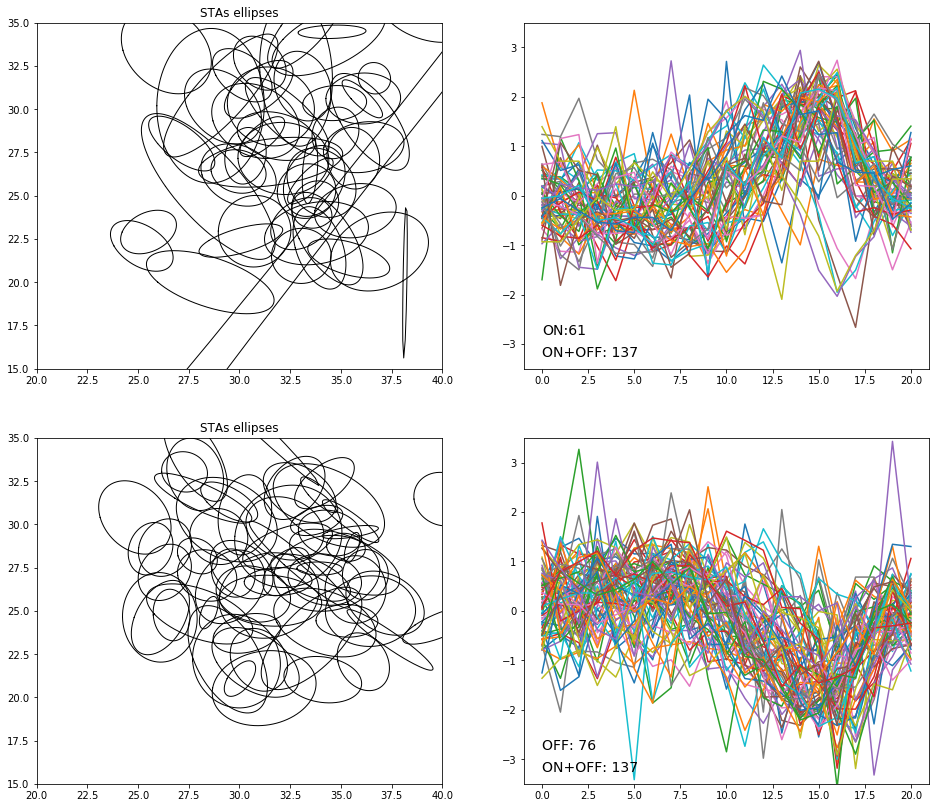

In [16]:
#Plot all ellipses
TotClus = 158
PLOT=True

PDF_folder = '/media/eqs8/Samuele_01/Exp_17/analysis/Check_5/'

cSTAs=[]
RF_fit = {}
checksize=75
if exp>10: checksize=60
#-----------------
fig=figure(figsize=(16,14))
ax={}
ax[1]=fig.add_subplot(2,2,1)
ax[2]=fig.add_subplot(2,2,2)
ax[3]=fig.add_subplot(2,2,3)
ax[4]=fig.add_subplot(2,2,4)

countpos=0
countneg=0
i=0
#-----------------
for id in list(clusid.keys())[0:TotClus]:
    neuron=id-1
    coor=matdata['EllipseCoor'][:,neuron]
    
    [X,Y] = meshgrid(np.arange(checksize), np.arange(checksize))
    X = X - (checksize-coor[0])
    Y = Y - (checksize-coor[1])
    GRF = 1*np.exp(-(X**2)/coor[2] - (Y**2)/coor[3] - coor[4]*X*Y )
    #GRF=GRF[::-1,::-1]
    
    minXY=16
    maxXY=44
    
    if coor[0]-minXY<0 or maxXY-coor[0]<0 or coor[1]-minXY<0 or maxXY-coor[1]<0: 
        i+=1
        continue
    
    sta = matdata['Temporal'][:,neuron]
    
    temp = [clusid[id],sta]
    cSTAs.append(temp)
    
    
    thresh=0.0
    tstart=10#14
    if sum(sta[tstart:18])/4>thresh:
        plotpos=0
        countpos+=1
    elif sum(sta[tstart:18])/4<-thresh:
        plotpos=1
        countneg+=1
    else:
        i+=1
        continue
    
    axn=plotpos*2+1
    
    
    #x[axn].set_xticks([])
    #ax[axn].set_yticks([])
    ax[axn].plot(checksize-matdata['Xell'][:,neuron],checksize-matdata['Yell'][:,neuron],'k',lw=1)
    
    #coor2:3 = sigma2
    ax[axn].title.set_text( 'STAs ellipses')
    
    ax[axn+1].plot(sta)
    
    
    i+=1
    
print('Clusters: ',i)
print('ON:' ,countpos)
print('OFF:' ,countneg)
print('ON+OFF:', countpos+countneg)

zoom=20
shiftx=0
shifty=-5

ax[1].set_xlim([0+zoom+shiftx,checksize-zoom+shiftx])
ax[1].set_ylim([0+zoom+shifty,checksize-zoom+shifty])
ax[3].set_xlim([0+zoom+shiftx,checksize-zoom+shiftx])
ax[3].set_ylim([0+zoom+shifty,checksize-zoom+shifty])

ax[2].set_ylim([-3.5,3.5])
ax[4].set_ylim([-3.5,3.5])

ax[2].text(0,-2.8,'ON:' +str(countpos),size=14)
ax[4].text(0,-2.8,'OFF: ' +str(countneg),size=14)
ax[2].text(0,-3.25,'ON+OFF: '+ str(countpos+countneg),size=14)
ax[4].text(0,-3.25,'ON+OFF: '+ str(countpos+countneg),size=14)
    
if UNSORTED:
    fsave = PDF_folder + 'exp'+str(exp)+ '_m'+ str(meas) +'_RF_STA_check' +'_UNSORTED'
else:
    fsave = PDF_folder + 'exp'+str(exp)+ '_m'+ str(meas) +'_RF_STA_check' 

fig.savefig(fsave+'.png',format='png',dpi=150)
# close(fig)  


filesave = 'cluster_STAs_exp'+str(exp)+'_sorted.csv'

np.savetxt(filesave, cSTAs,fmt='%s', delimiter=",")

In [18]:
exp

15